# EAS Data Mining

### Analisis Klasifikasi Pasien Liver di India Menggunakan Metode Regresi Logistik, Extra Trees, dan Random Forest

Indah Maryana (06211740000014)

Anita Syafira Irfan (06211740000024)

Hasri Wiji Aqsari (06211740000042)


## Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read data
data = pd.read_csv("D:\Semester 6\data mining\indian liver patient record.csv", sep=";")
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['Albumin_and_Globulin_Ratio'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['Albumin_and_Globulin_Ratio'].mean(),color='blue') 
plt.axvline(data['Albumin_and_Globulin_Ratio'].median(),color='red')

E:\Anaconda fix\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Anaconda fix\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
E:\Anaconda fix\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
E:\Anaconda fix\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


In [6]:
#Mengisi Missing Value dengan Mean
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
#Cek Missing Value
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
#Subset hanya diambil yang sakit liver
data2=data[data["Dataset"]==0]

In [9]:
#Subset hanya diambil yang tidak sakit liver
data3=data[data["Dataset"]==1]

In [10]:
#STATISTIKA DESKRIPTIF
data2.describe()
round(data2.describe(),2)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,416.00,416.00,416.00,416.00,416.00,416.00,416.00,416.00,416.00,416.0
mean,46.15,4.16,1.92,319.01,99.61,137.70,6.46,3.06,0.91,0.0
std,15.65,7.14,3.21,268.31,212.77,337.39,1.09,0.79,0.33,0.0
min,7.00,0.40,0.10,63.00,12.00,11.00,2.70,0.90,0.30,0.0
25%,34.00,0.80,0.20,186.00,25.00,29.75,5.70,2.50,0.70,0.0
50%,46.00,1.40,0.50,229.00,41.00,52.50,6.55,3.00,0.90,0.0
75%,58.00,3.62,1.80,315.25,76.50,108.75,7.20,3.62,1.10,0.0
max,90.00,75.00,19.70,2110.00,2000.00,4929.00,9.60,5.50,2.80,0.0


## Visualisasi

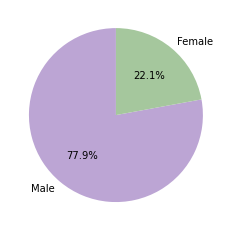

In [11]:
# Perbandingan cowok cewek yang sakit liver

%matplotlib inline

nctype = [data2.Gender[data2.Gender=='Male'].count(),data2.Gender[data2.Gender=='Female'].count()]
ctype = ['Male','Female']
plt.pie(nctype,labels=ctype,startangle=90,colors=['#bca5d4','#a5c79d'], autopct ='%.1f%%')
plt.show()

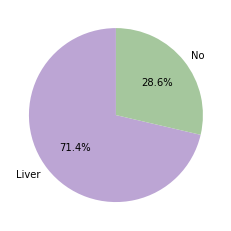

In [12]:
# Perbandingan pasien yang sakit liver vs tidak

%matplotlib inline

nctype = [data.Dataset[data.Dataset==0].count(),data.Dataset[data.Dataset==1].count()]
ctype = ['Liver','No']
plt.pie(nctype,labels=ctype,startangle=90,colors=['#bca5d4','#a5c79d'], autopct ='%.1f%%')
plt.show()

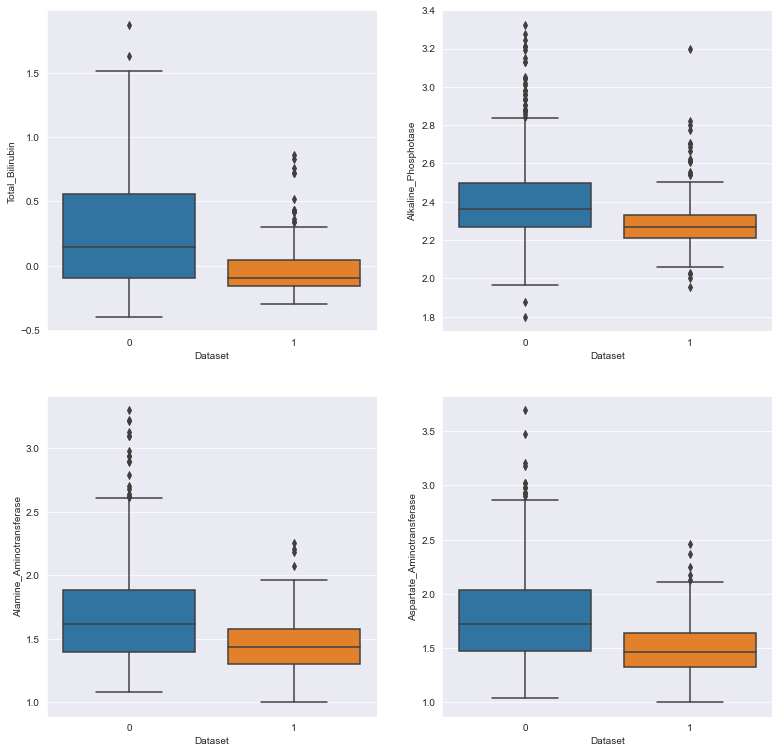

In [13]:
#Box plot untuk lihat beberapa variabel yg tinggi jika liver

sns.set_style ('darkgrid')
f, axes = plt.subplots(2,2, figsize = (13,13))

#plot [0,0]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Total_Bilirubin']), ax=axes[0,0])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Total_Bilirubin')
axes[0,0].set_title=('Liver vs Total_Bilirubin')

#plot [0,1]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Alkaline_Phosphotase']), ax=axes[0,1])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Alkaline_Phosphotase')
axes[0,0].set_title=('Liver vs Alkaline_Phosphotase')

#plot [1,0]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Alamine_Aminotransferase']), ax=axes[1,0])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Alamine_Aminotransferase')
axes[0,0].set_title=('Liver vs Alamine_Aminotransferase')

#plot [1,1]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Aspartate_Aminotransferase']), ax=axes[1,1])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Aspartate_Aminotransferase')
axes[0,0].set_title=('Liver vs Aspartate_Aminotransferase')

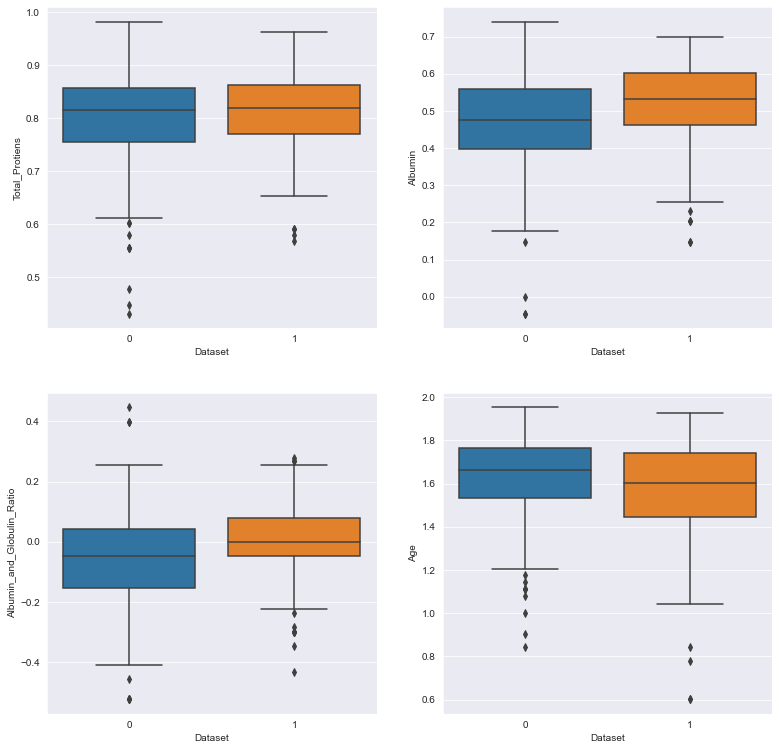

In [14]:
sns.set_style ('darkgrid')
f, axes = plt.subplots(2,2, figsize = (13,13))

#plot [0,0]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Total_Protiens']), ax=axes[0,0])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Total_Protiens')
axes[0,0].set_title=('Liver vs Total_Protiens')

#plot [0,1]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Albumin']), ax=axes[0,1])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Albumin')
axes[0,0].set_title=('Liver vs Albumin')

#plot [1,0]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Albumin_and_Globulin_Ratio']), ax=axes[1,0])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Albumin_and_Globulin_Ratio')
axes[0,0].set_title=('Liver vs Albumin_and_Globulin_Ratio')

#plot [1,1]
sns.boxplot(data=data, x = 'Dataset', y = np.log10(data['Age']), ax=axes[1,1])
axes[0,0].set_xlabel=['Liver','No']
axes[0,0].set_ylabel=('Age')
axes[0,0].set_title=('Liver vs Age')

## Feature Selection

In [15]:
# ambil variabel numerik aja + buang variabel dataset

new_data = data.select_dtypes([np.number])
new_data.drop(['Dataset'],axis=1,inplace=True)
new_data.head(3)

E:\Anaconda fix\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [16]:
# feature selection - correlation thresholds: menghilangkan salah satu variabel yang punya korelasi tinggi (set 0.9)

def find_correlation(df, thresh=0.9):    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(new_data,thresh=0.9)

[]

In [17]:
# feature selection - variance thresholds: menghilangkan variabel yang varians kecil (set 0.1)
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(0.1)
data_hv = thresholder.fit_transform(new_data)
data_hv_df = pd.DataFrame(data_hv)
data_hv_df.head(5)

,0,1,2,3,4,5,6,7,8
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40


## Klasifikasi

In [18]:
X = data.drop(['Gender','Dataset'], axis=1)
y = data['Dataset']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.metrics import specificity_score, sensitivity_score

### Regresi Logistik

E:\Anaconda fix\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 77.71%

Confusion Matrix : 
[[124   5]
 [ 34  12]]

Sensitivity : 78.48%

Specificity : 70.59%

F-Score : 79.23%

AUC : 61.11%


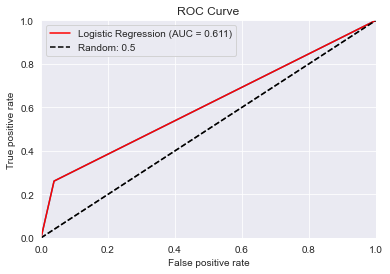

In [26]:
# Holdout Repeated
for i in range (0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state = 52)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_train_hat = logreg.predict(X_train)
y_test_hat = logreg.predict(X_test)
y_test_quant = logreg.predict_proba(X_test)[:,1]
result = logreg.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

cm = confusion_matrix(Y_test, y_test_hat)
print('\nConfusion Matrix : \n'+ str(cm))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("\nSensitivity : %.2f%%" % (sensitivity*100.0))
specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print("\nSpecificity : %.2f%%" % (specificity*100.0))
fscore = 2*precision*sensitivity/(precision+sensitivity)
print("\nF-Score : %.2f%%" % (fscore*100.0))
logreg_auc = roc_auc_score(Y_test, y_test_hat)
print("\nAUC : %.2f%%" % (logreg_auc*100.0))

fpr, tpr, thresholds = roc_curve(Y_test,y_test_hat)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot ([0,1], [0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, linestyle = '-', label = "Logistic Regression (AUC = {:.3f})".format(logreg_auc), color = "r")
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

E:\Anaconda fix\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
E:\Anaconda fix\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 75.86%

Confusion Matrix : 
[[41  0]
 [14  3]]

Sensitivity : 74.55%

Specificity : 100.00%

F-Score : 77.18%

AUC : 58.82%


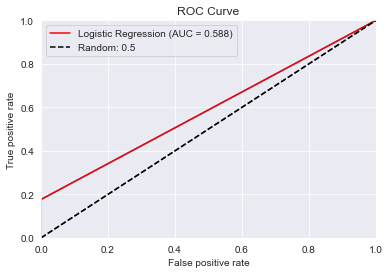

In [28]:
# K-Fold Cross Validation
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, KFold
KFold = StratifiedKFold(n_splits=10, random_state=49)
for itrain, itest in KFold.split(X,y):
    X_train,X_test = X.loc[itrain],X.loc[itest]
    Y_train,Y_test = y.loc[itrain],y.loc[itest]
reg_log = LogisticRegression()
reg_log.fit(X_train, Y_train)
y_train_hat = reg_log.predict(X_train)
y_test_hat = reg_log.predict(X_test)
jawaban = reg_log.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (jawaban*100.0))

cm = confusion_matrix(Y_test, y_test_hat)
print('\nConfusion Matrix : \n'+ str(cm))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("\nSensitivity : %.2f%%" % (sensitivity*100.0))
specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print("\nSpecificity : %.2f%%" % (specificity*100.0))
fscore = 2*precision*sensitivity/(precision+sensitivity)
print("\nF-Score : %.2f%%" % (fscore*100.0))
reg_log_auc = roc_auc_score(Y_test, y_test_hat)
print("\nAUC : %.2f%%" % (reg_log_auc*100.0))


fpr, tpr, thresholds = roc_curve(Y_test,y_test_hat)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot ([0,1], [0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, linestyle = '-', label = "Logistic Regression (AUC = {:.3f})".format(reg_log_auc), color = "r")
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Extra Trees

Accuracy: 78.29%

Confusion Matrix : 
[[120   8]
 [ 30  17]]

Sensitivity : 80.00%

Specificity : 68.00%

F-Score : 80.00%

AUC : 64.96%


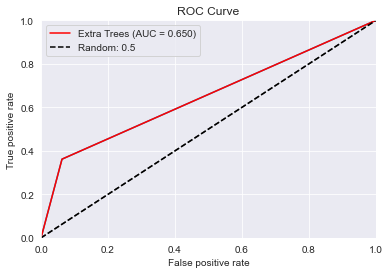

In [29]:
# Holdout Repeated
for i in range (0,10):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=48)
xtratrees = ExtraTreesClassifier(random_state=52)
xtratrees.fit(X_train, Y_train)
y_train_hat = xtratrees.predict(X_train)
y_test_hat = xtratrees.predict(X_test)
result = xtratrees.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

cm = confusion_matrix(Y_test, y_test_hat)
print('\nConfusion Matrix : \n'+ str(cm))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("\nSensitivity : %.2f%%" % (sensitivity*100.0))
specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print("\nSpecificity : %.2f%%" % (specificity*100.0))
fscore = 2*precision*sensitivity/(precision+sensitivity)
print("\nF-Score : %.2f%%" % (fscore*100.0))
xtratrees_auc = roc_auc_score(Y_test, y_test_hat)
print("\nAUC : %.2f%%" % (xtratrees_auc*100.0))

fpr, tpr, thresholds = roc_curve(Y_test,y_test_hat)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot ([0,1], [0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, linestyle = '-', label = "Extra Trees (AUC = {:.3f})".format(xtratrees_auc), color = "r")
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

E:\Anaconda fix\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 77.59%

Confusion Matrix : 
[[40  1]
 [12  5]]

Sensitivity : 76.92%

Specificity : 83.33%

F-Score : 78.43%

AUC : 63.49%


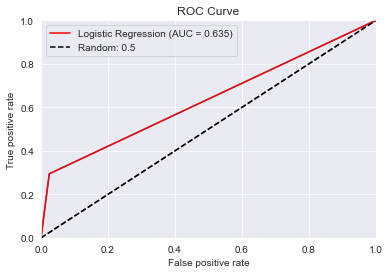

In [30]:
# K-Fold Cross Validation
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, KFold
KFold = StratifiedKFold(n_splits=10, random_state=50)
for itrain, itest in KFold.split(X,y):
    X_train,X_test = X.loc[itrain],X.loc[itest]
    Y_train,Y_test = y.loc[itrain],y.loc[itest]
extra = ExtraTreesClassifier(random_state=46)
extra.fit(X_train, Y_train)
y_train_hat = extra.predict(X_train)
y_test_hat = extra.predict(X_test)
hasil = extra.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (hasil*100.0))

cm = confusion_matrix(Y_test, y_test_hat)
print('\nConfusion Matrix : \n'+ str(cm))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("\nSensitivity : %.2f%%" % (sensitivity*100.0))
specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print("\nSpecificity : %.2f%%" % (specificity*100.0))
fscore = 2*precision*sensitivity/(precision+sensitivity)
print("\nF-Score : %.2f%%" % (fscore*100.0))
extra_auc = roc_auc_score(Y_test, y_test_hat)
print("\nAUC : %.2f%%" % (extra_auc*100.0))

fpr, tpr, thresholds = roc_curve(Y_test,y_test_hat)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot ([0,1], [0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, linestyle = '-', label = "Logistic Regression (AUC = {:.3f})".format(extra_auc), color = "r")
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Random Forest

Accuracy: 77.14%

Confusion Matrix : 
[[115   8]
 [ 32  20]]

Sensitivity : 78.23%

Specificity : 71.43%

F-Score : 79.11%

AUC : 65.98%


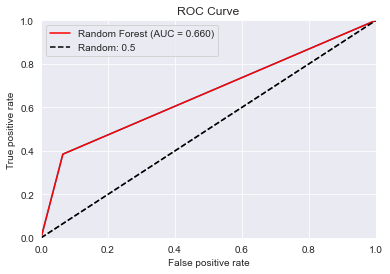

In [31]:
#Holdout Repeated
for i in range (0,10):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=50)
random = RandomForestClassifier(n_estimators=100, random_state=53)
random.fit(X_train, Y_train)
y_train_hat = random.predict(X_train)
y_test_hat = random.predict(X_test)
result = random.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

cm = confusion_matrix(Y_test, y_test_hat)
print('\nConfusion Matrix : \n'+ str(cm))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("\nSensitivity : %.2f%%" % (sensitivity*100.0))
specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print("\nSpecificity : %.2f%%" % (specificity*100.0))
fscore = 2*precision*sensitivity/(precision+sensitivity)
print("\nF-Score : %.2f%%" % (fscore*100.0))
random_auc = roc_auc_score(Y_test, y_test_hat)
print("\nAUC : %.2f%%" % (random_auc*100.0))

fpr, tpr, thresholds = roc_curve(Y_test,y_test_hat)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot ([0,1], [0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, linestyle = '-', label = "Random Forest (AUC = {:.3f})".format(random_auc), color = "r")
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

E:\Anaconda fix\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 81.03%

Confusion Matrix : 
[[40  1]
 [10  7]]

Sensitivity : 80.00%

Specificity : 87.50%

F-Score : 80.00%

AUC : 69.37%


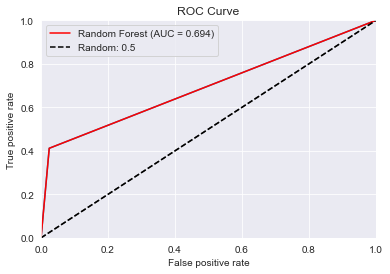

In [32]:
# K-Fold Cross Validation
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, KFold
KFold = StratifiedKFold(n_splits=10, random_state=50)
for itrain, itest in KFold.split(X,y):
    X_train,X_test = X.loc[itrain],X.loc[itest]
    Y_train,Y_test = y.loc[itrain],y.loc[itest]
randfor = RandomForestClassifier(random_state=54)
randfor.fit(X_train, Y_train)
y_train_hat = randfor.predict(X_train)
y_test_hat = randfor.predict(X_test)
result = randfor.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

cm = confusion_matrix(Y_test, y_test_hat)
print('\nConfusion Matrix : \n'+ str(cm))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("\nSensitivity : %.2f%%" % (sensitivity*100.0))
specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print("\nSpecificity : %.2f%%" % (specificity*100.0))
fscore = 2*precision*sensitivity/(precision+sensitivity)
print("\nF-Score : %.2f%%" % (fscore*100.0))
randfor_auc = roc_auc_score(Y_test, y_test_hat)
print("\nAUC : %.2f%%" % (randfor_auc*100.0))

fpr, tpr, thresholds = roc_curve(Y_test,y_test_hat)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot ([0,1], [0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, linestyle = '-', label = "Random Forest (AUC = {:.3f})".format(randfor_auc), color = "r")
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()